In [34]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [35]:
df=pd.read_excel(r'DataFinal17-20.xlsx',sheet_name='2020')
df2=df.iloc[:,2:16]
df2=df2.drop(['Total'], axis=1)
df2.head()
from sklearn import preprocessing
df_standardized = preprocessing.scale( df2 )
df1 = pd.DataFrame( df_standardized )


In [36]:
from sklearn.cluster import KMeans

#create a list for the wcss parameter
wcss = []
#test with 14 clusters
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

In [37]:
wcss

[455.0,
 183.15163902707062,
 121.00520284639016,
 77.72527132804295,
 57.19196898334106,
 43.20454952915056,
 33.50410783186294,
 27.826870740722036,
 22.576706877494622,
 19.703831936011063,
 16.477641547770464,
 13.851069756261888,
 11.696519258289692,
 9.585075372115798]

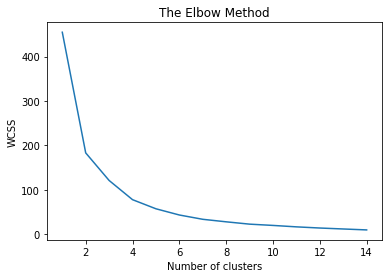

In [38]:
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
import seaborn as sns

In [40]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 14

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(df1)
  labels = kmeans.labels_
  sil.append(silhouette_score(df1, labels, metric = 'euclidean'))

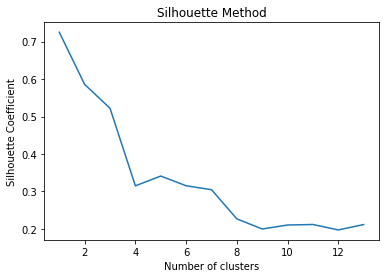

In [41]:
plt.plot(range(1, 14), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [42]:
km=KMeans(n_clusters=6)
y_pred=km.fit_predict(df1)

In [43]:
y_pred

array([3, 5, 1, 1, 1, 5, 1, 5, 5, 5, 5, 5, 1, 1, 1, 1, 2, 3, 1, 5, 3, 5,
       5, 5, 0, 5, 5, 1, 1, 5, 3, 4, 5, 5, 1])

In [44]:
df['cluster']=y_pred
df.head()

,SrNo,District,Homicide/Murder,Causing death by negligence,Hurt,Assault on woman,Kidnapping and abduction,Human trafficking,Rape,Offence against public tranquility,...,Others,Total,Population,Crime Rate,Sex Ratio,Literacy,Density,Latitude,Longitude,cluster
0,1,Ahmednagar,254,620,1826,543,369,0,92,905,...,221,38689,4543159,0.851588,939,0.7905,266,19.094829,74.747979,3
1,2,Akola,114,116,1345,245,76,0,28,111,...,213,7524,1813906,0.414795,946,0.8805,320,20.700216,77.008168,5
2,3,Amravati,201,354,2133,461,190,0,97,144,...,164,10113,2888445,0.350119,951,0.8738,237,20.931982,77.752304,1
3,4,Aurangbad,139,386,1869,335,242,0,80,428,...,411,12268,3701282,0.331453,923,0.7902,366,19.876165,75.343314,1
4,5,Beed,206,308,1233,248,91,0,50,508,...,111,5719,2585049,0.221234,916,0.7699,242,18.990088,75.753132,1


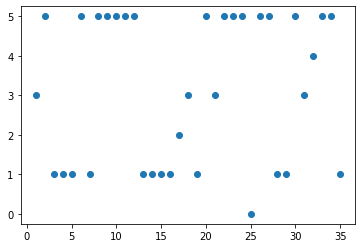

In [45]:
plt.scatter(df['SrNo'],df['cluster'])
#for col in df.columns:
 #   print(col)

In [46]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 

In [47]:
z = linkage(df1, method="complete",metric="euclidean")

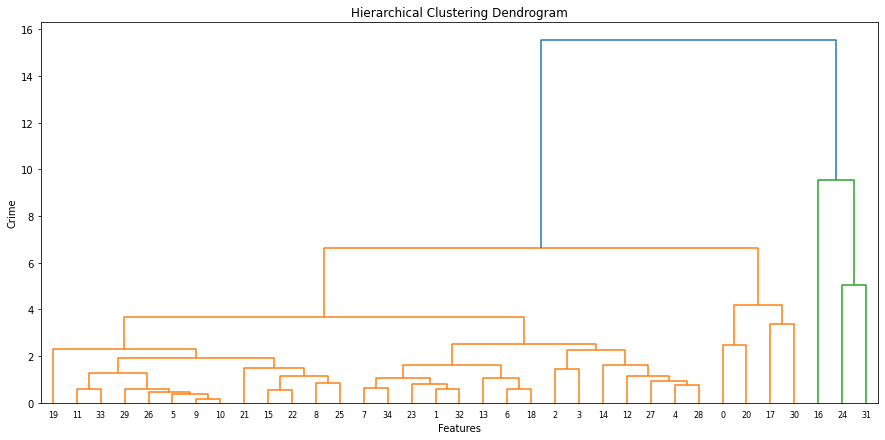

In [48]:
plt.figure(figsize=(15,7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Crime')
sch.dendrogram(z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [49]:
#df = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx', sheet_name='your Excel sheet name')


In [50]:
X = df2[['Homicide/Murder','Causing death by negligence','Hurt','Assault on woman','Kidnapping and abduction','Human trafficking ','Rape','Offence against public tranquility','Offences against property','Offences relating to documents and property marks','Miscellaneous','Others']]
clusters = KMeans(6)  # 6 clusters
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_
df2['Crime_clusters'] = clusters.labels_
df2.head()
df2.sort_values(by=['Crime_clusters'],ascending = True)
X.head()

,Homicide/Murder,Causing death by negligence,Hurt,Assault on woman,Kidnapping and abduction,Human trafficking,Rape,Offence against public tranquility,Offences against property,Offences relating to documents and property marks,Miscellaneous,Others
0,254,620,1826,543,369,0,92,905,3104,220,30535,221
1,114,116,1345,245,76,0,28,111,946,86,4244,213
2,201,354,2133,461,190,0,97,144,2198,250,3921,164
3,139,386,1869,335,242,0,80,428,3821,265,4292,411
4,206,308,1233,248,91,0,50,508,1002,104,1858,111


In [51]:
stats =df2.sort_values("Hurt", ascending=True)
stats

,Homicide/Murder,Causing death by negligence,Hurt,Assault on woman,Kidnapping and abduction,Human trafficking,Rape,Offence against public tranquility,Offences against property,Offences relating to documents and property marks,Miscellaneous,Others,Population,Crime_clusters
29,18,50,241,53,18,0,6,43,178,48,330,14,849651,0
26,39,106,250,53,43,0,11,109,361,113,388,18,1615069,0
19,62,133,255,44,57,0,17,116,429,38,2930,3053,1648295,5
9,65,135,303,55,32,0,17,21,302,41,427,27,1072942,0
10,50,131,311,57,40,0,18,23,400,30,996,134,1322507,0
25,47,191,334,77,73,0,20,165,533,141,474,105,2634200,0
8,84,352,433,80,98,1,14,205,781,77,1237,175,2050862,0
21,79,232,466,158,217,4,62,95,1859,500,1827,85,1120547,0
5,41,141,486,88,71,0,16,43,676,60,1051,54,1200334,0
11,75,119,649,73,27,0,15,140,436,35,1314,30,1177345,0


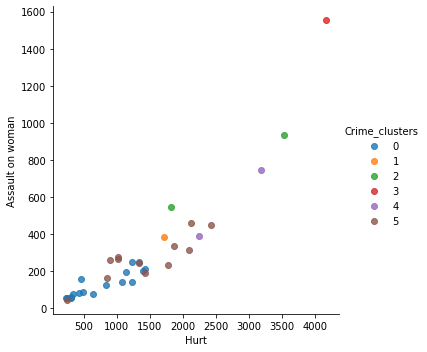

In [52]:
sns.lmplot(x='Hurt',y='Assault on woman',data=df2,hue = 'Crime_clusters',fit_reg=False);

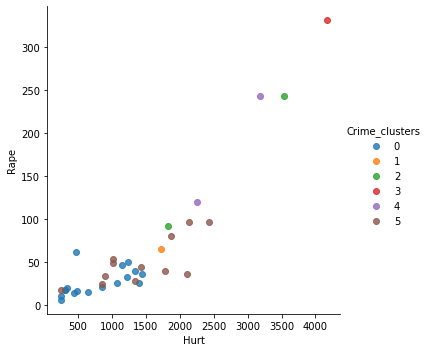

In [53]:
sns.lmplot(x='Hurt',y='Rape',data=df2,hue = 'Crime_clusters',fit_reg=False);

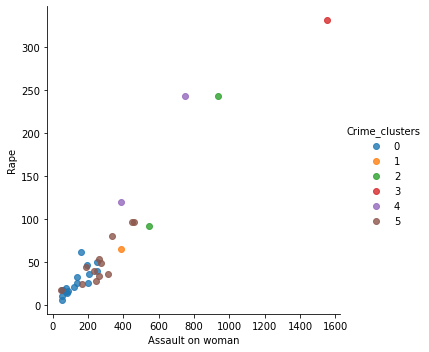

In [54]:
sns.lmplot(x='Assault on woman',y='Rape',data=df2,hue = 'Crime_clusters',fit_reg=False);

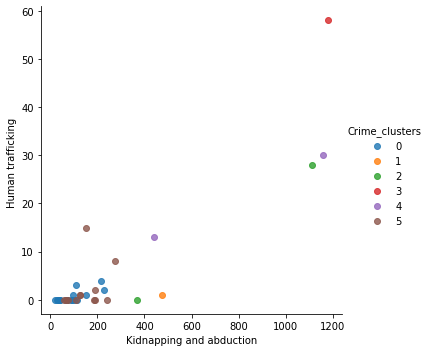

In [55]:
sns.lmplot(x='Kidnapping and abduction',y='Human trafficking ',data=df2,hue = 'Crime_clusters',fit_reg=False);

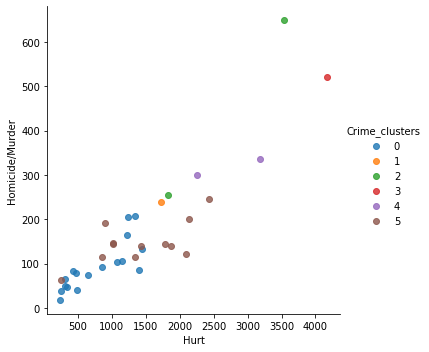

In [56]:
sns.lmplot(x='Hurt',y='Homicide/Murder',data=df2,hue = 'Crime_clusters',fit_reg=False);